# K-Means Clustering

Jupyter notebook ini digunakan untuk memberikan contoh segmentasi konsumen dengan menggunakan K-Means Clustering. Kebanyakan isi dari materi ini diambil dari:
* [Customer Segmentation with K-Means in Python](https://medium.com/codex/customer-segmentation-with-k-means-in-python-18336fb915be): sumber utama dengan dataset yang berbeda dan disesuaikan dengan perkembangan berbagai pustaka dan software yang digunakan.
* Dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
* Dokumentasi: Python, Conda, Matplotlib, Scikit-learn, Seaborn, Mplot3d, Termcolor

Materi dibagi menjadi 5 bagian:
1. Penyiapan paket dan konfigurasi awal
2. Mengambil data
3. Berbagai visualisasi data
4. Normalisasis data
5. K-Means Clustering

# Penyiapan paket dan konfigurasi awal

In [70]:
# Import berbagai paket yang diperlukan

# Paket untuk mengelola data
import pandas as pd 
import numpy as np 

# Paket untuk visualisasi data
import matplotlib.pyplot as plt 
import seaborn as sb 
from mpl_toolkits.mplot3d import Axes3D 

# Teks
from termcolor import colored as cl

# scikit-learn, untuk normalisasi data dan algoritma data mining
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 

# Konfigurasi awal
plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

## Mengambil data

In [72]:
# Membaca data (CSV), menetapkan index, dan menampilkan 5 data awal (head)

df = pd.read_csv('customers-02.csv')
df.set_index('CustomerID', inplace = True)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [71]:
# Menampilkan semua data

df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_num
CustomerID,,,,,
1,0,19,15,39,2
2,0,21,15,81,2
3,1,20,16,6,2
4,1,23,16,77,2
5,1,31,17,40,2
...,...,...,...,...,...
196,1,35,120,79,0
197,1,45,126,28,1
198,0,32,126,74,0


## Berbagai VIsualisasi Data

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


/home/bpdp/software/python-dev-tools/miniconda39/envs/py39-data-analytics/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


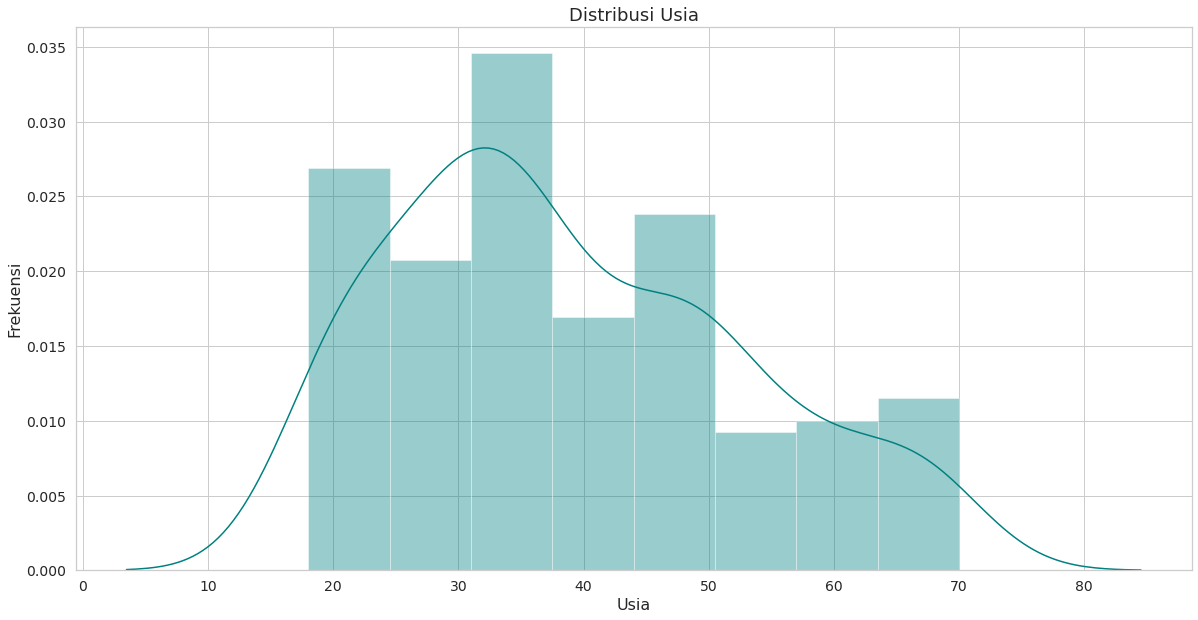

In [27]:
# Distribusi berdasarkan usia

# dengan termcolor, atribut teks menjadi tebal
# df.describe untuk menampilkan statistika deskriptif
# lihat di https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
print(cl(df['Age'].describe(), attrs = ['bold']))

# Plot distribusi berdasarkan usia (Age)
# distplot akan deprecated di versi berikutnya
# lihat versi sekarang di bagian bawah
sb.distplot(df['Age'], color = 'teal')
plt.title('Distribusi Usia', fontsize = 18)
plt.xlabel('Usia', fontsize = 16)
plt.ylabel('Frekuensi', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# simpan di direktori saat ini dan tampilkan di notebook
# savefig tidak harus dilakukan
plt.savefig('distribusi-usia.png')
plt.show()

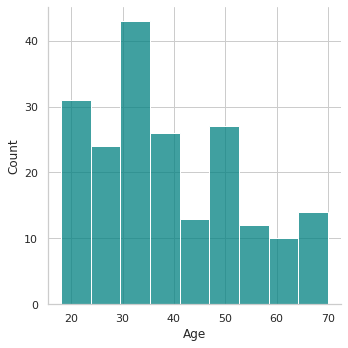

In [28]:
# Versi saat ini, lihat bedanya dengan tampilan di atas
sb.displot(df['Age'], color = 'teal')
plt.savefig('distribusi-usia-02.png')
plt.show()

Jumlah total data: 200
.......................................
Jumlah konsumen laki-laki: 88
.......................................
Jumlah konsumen perempuan: 112
.......................................
Prosentasi konsumen laki-laki: 44.0%
.......................................
Prosentasi konsumen perempuan: 56.00000000000001%
.......................................


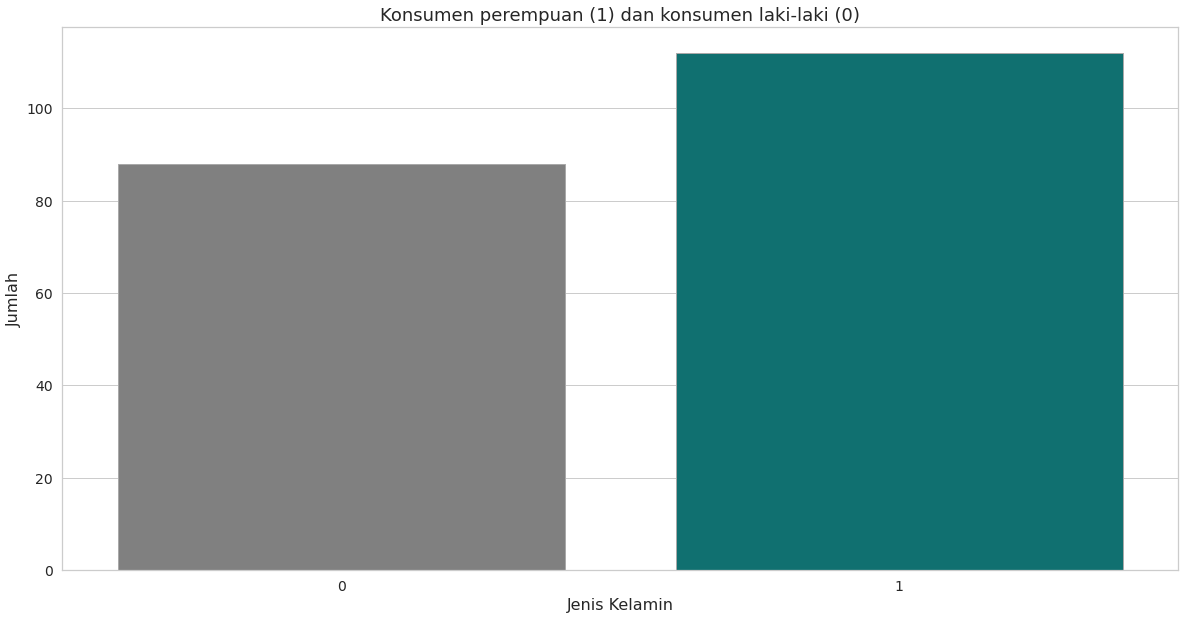

In [78]:
# Distribusi berdasarkan jenis kelamin
# Pada data telah didefinisikan:
# 0 => Laki-laki
# 1 => Perempuan

male_cust = df[df['Gender'] == 0]
female_cust = df[df['Gender'] == 1]

# Jumlah data keseluruhan
idx = df.index
numrows = len(idx)

# Menampilkan data dalam bentuk teks
print(cl('Jumlah total data: {}'.format(numrows), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Jumlah konsumen laki-laki: {}'.format(len(male_cust)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Jumlah konsumen perempuan: {}'.format(len(female_cust)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Prosentasi konsumen laki-laki: {}%'.format((len(male_cust)/numrows)*100.00), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Prosentasi konsumen perempuan: {}%'.format((len(female_cust)/numrows)*100.00), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))

# Distribusi data berdasarkan gender
sb.countplot(x='Gender', data=df, palette = ['grey', 'teal'], edgecolor = 'darkgrey')
plt.title('Konsumen perempuan (1) dan konsumen laki-laki (0)', fontsize = 18)
plt.xlabel('Jenis Kelamin', fontsize = 16)
plt.ylabel('Jumlah', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('distribusi-jenis-kelamin.png')
plt.show()

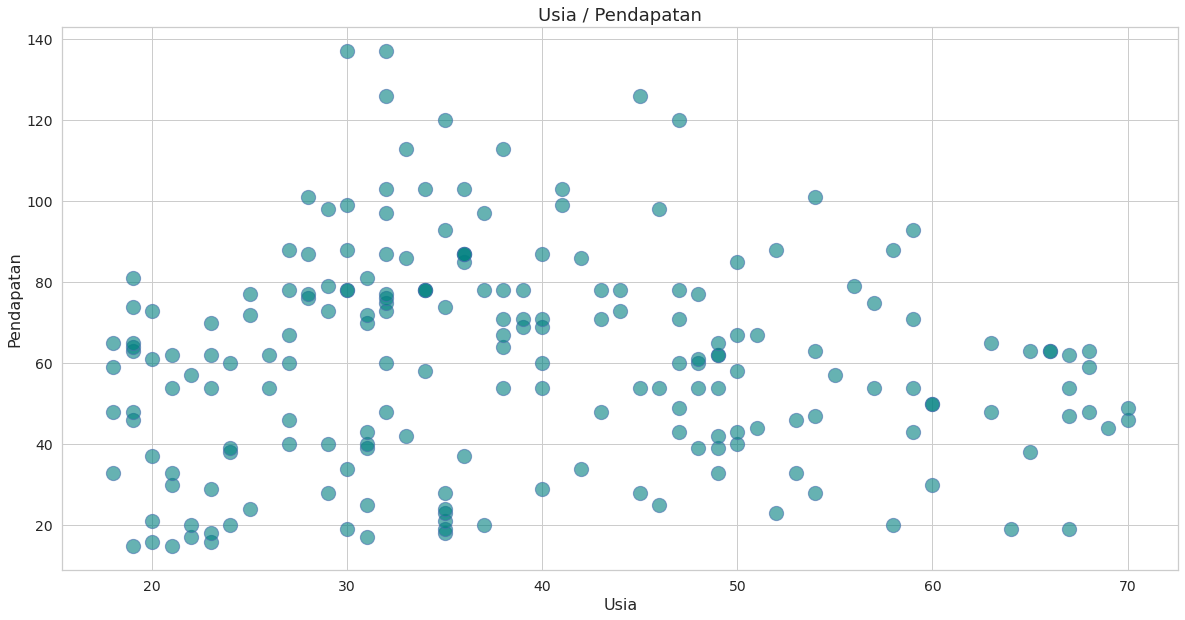

In [79]:
# Scatterplot
# Untuk melihat sebaran data usia dikatikan dengan pendapatan
#
# x = sumbu X
# y = sumbu Y
# data = data yang akan digunakan, dari CSV
# color = warna dari plot
# s = dari Matplotlb, s tidak ada di dokumentasi Seaborn tapi di Matplotlib
#     karena Seaborn berbasis pada Matplotlib
# alpha: opacity (ketidaktranparanan) proporsional untuk titik plot 
# edgecolor: dari Matplotlib, untuk warna ujung
#
# More info:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html 
#         (s dan edgecolor)
sb.scatterplot(x='Age', y='Annual Income (k$)', 
               data = df, 
               color = 'teal',
               s = 200, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('Usia / Pendapatan', 
          fontsize = 18)
plt.xlabel('Usia', 
           fontsize = 16)
plt.ylabel('Pendapatan', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('usia-pendapatan.png')
plt.show()

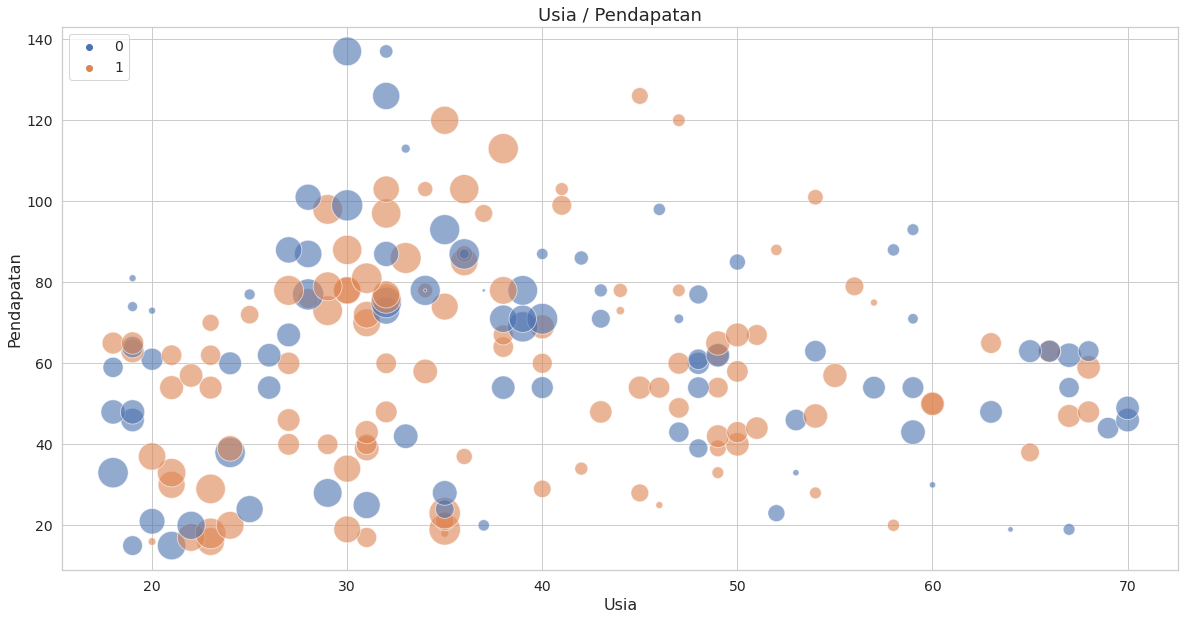

In [62]:
# Sebaran berdasarkan usia dan pendapatan
# serta Spending Score (untuk besar plot)

# supaya bisa terlihat seberapa besar spending score,
# maka ditentukan area dari plot
#
area = df['Spending Score (1-100)']*10

# Hue: variabel yang akan dijadikan dasar pengelompokan
#      disarankan merupakan caegorical variabels
#      seperti pada program ini, Gender merupakan categorical vars
# 
sb.scatterplot(x='Age', y='Annual Income (k$)', 
               data = df, 
               s = area, 
               alpha = 0.6, 
               edgecolor = 'white', 
               hue = 'Gender', 
               palette = 'deep')
plt.title('Usia / Pendapatan', fontsize = 18)
plt.xlabel('Usia', fontsize = 16)
plt.ylabel('Pendapatan', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('usia-pendapatan-kelompok-gender.png')
plt.show()

## Normalisasi data

**Normalisasi data** dalam statistika digunakan untuk melakukan penyesuaian terhadap data yang diukur dengan skala berbeda, menjadi skala yang umum. Fungsi normalisasi adalah untuk melakukan transformasi semua variabel pada data ke suatu *range* yang sama. 

Normalisasi tidak digunakan untuk menghilangkan atau mengantisipasi *outlier* (data hasil observasi yang berada pada jarak abnormal dibandingkan dengan data lainnya).


In [84]:
X = df.values

# Semua hasil observasi yang nan (not-a-number) diubang ke numerik.
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Sampel data untuk cluster : ', attrs = ['bold']), cluster_data[:5])
# Jika ingin menampilkan semua data hasil normalisasi, uncomment berikut ini:
# print(cl('Sampel data untuk cluster : ', attrs = ['bold']), cluster_data)

Sampel data untuk cluster :  [[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]]


## Clustering K-Means

In [82]:
# Menentukan jumlah cluster
# Ada beberapa metode untuk menentukan jumlah: 
# elbow, silhouette, gap statistic
# untuk keperluan di mata kuliah Informatika, mari asumsikan jumlah cluster 3
clusters = 3

# Definisi model menggunakan KMeans dengan metode k-means++
# More: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#
# init: metode, selain ini bisa menggunakan 'random'
# n_clusters: jumlah cluster
# n_init: jumlah berapa kali algoritma k-means akan dijalankan dengan centroid 
#         yang berbeda-beda
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
# Menghitung K-Means untuk data X yang telah disiapkan sebelumnya.
model.fit(X)

# Label dari cluster: label 0, 1, dan 2
labels = model.labels_
print(cl(labels, attrs = ['bold']))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [85]:
# Menetapkan kolom tambahan berupa label dari cluster (0, 1, 2)
#
df['cluster_num'] = labels
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_num
CustomerID,,,,,
1,0,19,15,39,2
2,0,21,15,81,2
3,1,20,16,6,2
4,1,23,16,77,2
5,1,31,17,40,2
...,...,...,...,...,...
196,1,35,120,79,1
197,1,45,126,28,0
198,0,32,126,74,1


In [86]:
# Data-rata untuk setiap cluster. 
# Catatan: tidak perlu diperhatikan untuk Gender.
#
df.groupby('cluster_num').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster_num,,,,
0,0.473684,40.394737,87.000000,18.631579
1,0.538462,32.692308,86.538462,82.128205
2,0.593496,40.325203,44.154472,49.829268


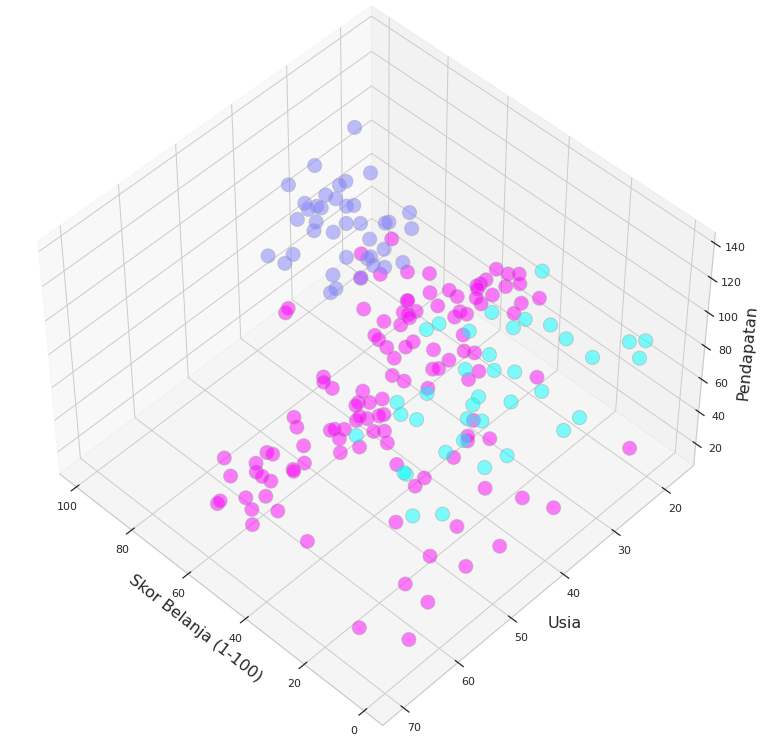

In [94]:
# Visualisasi clustering
# Ada 3 warna sesuai dengan jumlah cluster (3)
#

# Menginisialisasi nomor 1 sebagai pengenal dari image grafik yang akan dibuat.
fig = plt.figure(1)
# clf: membersihkan figure, memastikan bahwa belum digunakan
plt.clf()
# Membuat diagram 3 dimensi untuk fig:
#   rect: segi empat untuk posisi sumbu
#   elev: sudut pandang elevasi
#   azim: sudut pandang azimut, default -60
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)
# Bersihkan sumbu-sumbu
plt.cla()

# Membuat scatterplot
# 
ax.scatter(df['Spending Score (1-100)'], df['Age'], df['Annual Income (k$)'], 
           c = df['cluster_num'], 
           s = 200, 
           cmap = 'cool', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Skor Belanja (1-100)', fontsize = 16)
ax.set_ylabel('Usia', fontsize = 16)
ax.set_zlabel('Pendapatan', fontsize = 16)

plt.savefig('3d_plot.png')
plt.show()